In [1]:
import pandas as pd

names = pd.read_csv('Player Name Information.csv')
raw = pd.read_csv('Raw Data Set.csv')

In [2]:
# iterate through each pitch/event in order to query name information from player name dataframe
for event in raw.itertuples():
    pitcher = names[names.BAM_ID == event.PITCHERID]  # query player ids from diff dataframes
    pitcher_first = pitcher.ROSTER_FIRST_NAME.iloc[0]  # return the first (only 1) index from the first name column
    pitcher_last = pitcher.LAST_NAME.iloc[0]  # return the first (only 1) index from the last name column
    pitcher_name = pitcher_last + ", " + pitcher_first  # concat
    raw.loc[event.Index, ['PITCHER', 'PITCHER_LAST_NAME', 'PITCHER_ROSTER_FIRST_NAME']] = pitcher_name, pitcher_last, pitcher_first  # assign all vars to columns

    batter = names[names.BAM_ID == event.BATTERID]  # query player ids from diff dataframes
    batter_first = batter.ROSTER_FIRST_NAME.iloc[0]  # return the first (only 1) index from the first name column
    batter_last = batter.LAST_NAME.iloc[0]  # return the first (only 1) index from the last name column
    batter_name = batter_last + ", " + batter_first  # concat
    raw.loc[event.Index, ['BATTER', 'BATTER_LAST_NAME', 'BATTER_ROSTER_FIRST_NAME']] = batter_name, batter_last, batter_first  # assign all vars to columns

raw.head()

,PITCHNO,TM_DATE,TM_TIME,UTCDATE,UTCTIME,LOCALDATETIME,UTCDATETIME,PAOFINNING,PITCHOFPA,PITCHER,...,PFXZ,HOMETEAM,AWAYTEAM,STADIUM,LEVEL,GAMEID,PITCHER_LAST_NAME,PITCHER_ROSTER_FIRST_NAME,BATTER_LAST_NAME,BATTER_ROSTER_FIRST_NAME
0,1,4/20/2021,17:23.9,00:00.0,17:23.9,2021-04-20 19:17:23.8830000 -07:00,2021-04-21 02:17:23.8830000 +00:00,1,1,"Paddack, Chris",...,NaN,SD,MIL,Petco,MLB,20210420-Petco-1,Paddack,Chris,Bradley,Jackie
1,2,4/20/2021,17:24.9,00:00.0,17:24.9,2021-04-20 19:17:24.8830000 -07:00,2021-04-21 02:17:24.8830000 +00:00,2,1,"Paddack, Chris",...,NaN,SD,MIL,Petco,MLB,20210420-Petco-1,Paddack,Chris,Vogelbach,Daniel
2,3,4/20/2021,17:25.9,00:00.0,17:25.9,2021-04-20 19:17:25.8830000 -07:00,2021-04-21 02:17:25.8830000 +00:00,2,2,"Paddack, Chris",...,NaN,SD,MIL,Petco,MLB,20210420-Petco-1,Paddack,Chris,Vogelbach,Daniel
3,4,4/20/2021,17:26.9,00:00.0,17:26.9,2021-04-20 19:17:26.8830000 -07:00,2021-04-21 02:17:26.8830000 +00:00,2,3,"Paddack, Chris",...,NaN,SD,MIL,Petco,MLB,20210420-Petco-1,Paddack,Chris,Vogelbach,Daniel
4,5,4/20/2021,17:27.9,00:00.0,17:27.9,2021-04-20 19:17:27.8830000 -07:00,2021-04-21 02:17:27.8830000 +00:00,2,4,"Paddack, Chris",...,NaN,SD,MIL,Petco,MLB,20210420-Petco-1,Paddack,Chris,Vogelbach,Daniel


II. Filter any records that are missing a PITCH_TYPE and summarize the average and 90th percentile of RELSPEED, HORZBREAK, INDUCEDVERTBREAK, SPINRATE, RELHEIGHT, and RELSIDE for each PITCHER -> PITCH_TYPE in the data set.

In [3]:
# drop missing PITCH_TYPE
raw_filtered = raw.dropna(axis='rows', subset='PITCH_TYPE')

In [4]:
import numpy as np

# Needed to implement function to pass an argument for the percentile aggregation
def percentile(q):
    def percentile_(x):
        return x.quantile(q)
    percentile_.__name__ = 'percentile_{:2.0f}'.format(q*100)
    return percentile_

pitch_metrics = raw_filtered[['PITCHER', 'PITCHERID', 'RELSPEED', 'HORZBREAK', 'INDUCEDVERTBREAK', 'SPINRATE', 'RELHEIGHT', 'RELSIDE', 'PITCH_TYPE']].groupby(['PITCHERID'])
for k, v in pitch_metrics:
    print("PITCHER: ", v.iat[0, 0])  # use .iat to retrieve the first item in the PITCHER column
    pitches = v.drop(['PITCHER', 'PITCHERID'], axis=1).groupby('PITCH_TYPE')  # drop the pitcher information for easier aggregation
    for pitch, metrics in pitches:
        print("--------")
        print(f"PITCH {pitch}")
        results = metrics.drop('PITCH_TYPE', axis=1).aggregate([np.mean, percentile(.9)])  # drop the PITCH_TYPE for cleaner aggregation
        print(results)
    print("----------------------------------------")


PITCHER:  Santana, Ervin
--------
PITCH CH
                RELSPEED  HORZBREAK  INDUCEDVERTBREAK     SPINRATE  RELHEIGHT  \
mean           85.267610  11.340950         16.185325  1744.826997   6.277335   
percentile_90  86.147522  13.478118         16.859153  1745.807530   6.283059   

                RELSIDE  
mean           1.539005  
percentile_90  1.546401  
--------
PITCH FA
                RELSPEED  HORZBREAK  INDUCEDVERTBREAK     SPINRATE  RELHEIGHT  \
mean           93.611056   3.700019         16.496682  2284.710183   6.119848   
percentile_90  95.025441   6.583464         20.064700  2340.037144   6.204778   

                RELSIDE  
mean           1.361805  
percentile_90  1.561558  
--------
PITCH SI
               RELSPEED  HORZBREAK  INDUCEDVERTBREAK     SPINRATE  RELHEIGHT  \
mean           92.66406    8.04871          13.87418  2228.243279    6.09636   
percentile_90  92.66406    8.04871          13.87418  2228.243279    6.09636   

               RELSIDE  
mean       

III.    Create a visual representing each pitcher’s average velocity by PITCH_TYPE against the MLB average velocity for each PITCH_TYPE (use the Raw Data Set as the entirety of MLB). The visual should be separated into 6 different sections, one for each pitch type in the data set. Be as creative as you would like with this and feel free to add any other relevant information to your visual.

In [10]:
# create empty DataFrame for average velo by pitch
avg_velo_by_pitch = pd.DataFrame(columns=['PITCH', 'PITCHER', 'RELSPEED'])

pitch_types = raw_filtered[['PITCHER', 'RELSPEED', 'PITCH_TYPE']].groupby('PITCH_TYPE')
mlb_averages = pitch_types.aggregate(np.mean)  # used for reference lines

for k, v in pitch_types:
    pitch_by_pitcher = v.groupby('PITCHER').aggregate(np.mean)  # return df with average speed for the PITCH_TYPE
    for i, x in pitch_by_pitcher.itertuples():
        avg_velo_by_pitch.loc[len(avg_velo_by_pitch)] = [k, i, x]  # fill up df with pitch, player, velo

avg_velo_by_pitch.head()

,PITCH,PITCHER,RELSPEED
0,CH,"Abreu, Albert",86.277550
1,CH,"Alcala, Jorge",87.191810
2,CH,"Allard, Kolby",83.931723
3,CH,"Alvarez, Jose",80.533090
4,CH,"Andriese, Matt",86.228900


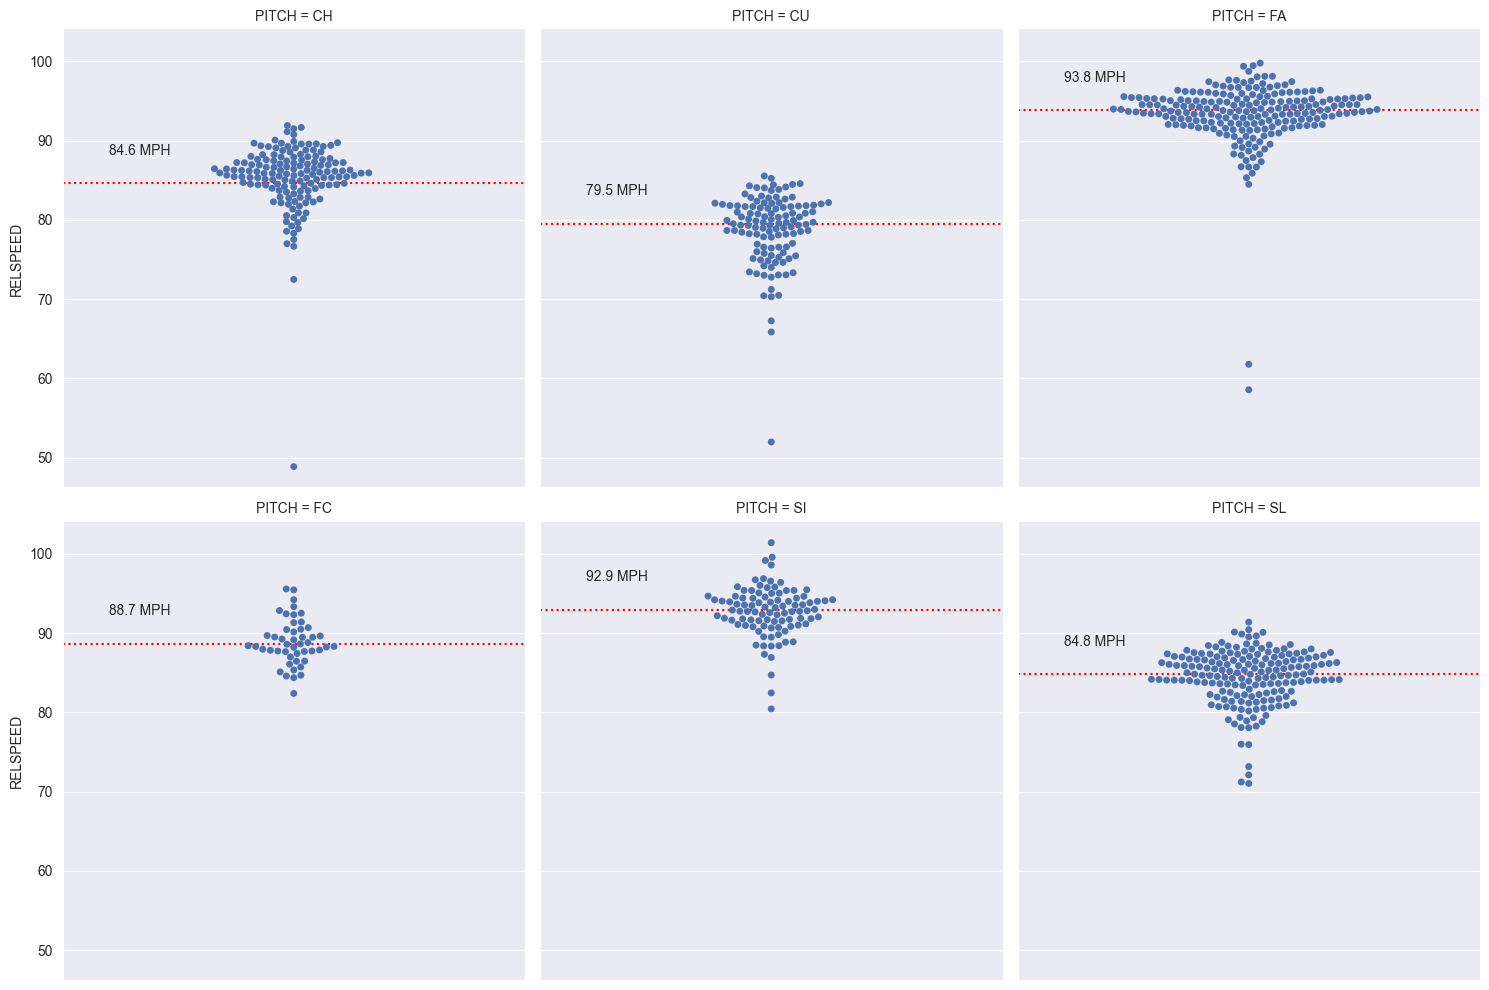

In [48]:
import seaborn as sns

g = sns.catplot(data=avg_velo_by_pitch,
                y='RELSPEED',
                kind='swarm',
                col='PITCH',
                col_wrap=3,
                palette='deep')

# mlb_average.values converts df to array, ax are in same order as mlb_averages so no extra matching needed
for ax, pos in zip(g.axes.flat, mlb_averages.values):
    ax.axhline(y=pos, color='r', linestyle=':')
    ax.text(x=-0.4,
            y=(pos + 5),
            s=f"{round(pos[0], 1)} MPH",
            ha="left",
            va="top")

In [47]:
avg_velo_by_pitch.to_csv(path_or_buf='avg_velo.csv')